First Data Science Project - Uraih

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd

In [16]:
SAT = pd.read_csv("/Users/Chudi8GB/Desktop/REPII/project-1/data/sat.csv", index_col=0)

In [17]:
ACT = pd.read_csv("/Users/Chudi8GB/Desktop/REPII/project-1/data/act.csv", index_col=0)

##### 2. Print the first ten rows of each dataframe.

In [18]:
SAT.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [26]:
SAT.tail()


,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [19]:
ACT.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [25]:
ACT.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


##### 3. Describe in words what each variable (column) is.

In [ ]:
'''
For the SAT dataframe, 
State - State where student took the SAT test.
Participation - Percentage of eligible highschool students that take the SAT.
Evidence-Based Reading and Writing - The average score for the state on the Evidence-Based Reading and Writing section 
of the SAT.
Math - The average score for the state on the Math section of the SAT.
Total - The average combined SAT score for the state. 
'''

In [ ]:
'''
For the ACT dataframe
State - The state where the student took the ACT.
Participation - Percentage of eligible highschool students that take the SAT.
English - The average score for the english test on the ACT.
Math - The average score for the math test on the ACT.
Reading - The average score for the reading test on the ACT.
Science - The average score for the science test on the ACT.
Composite - The average of your four test scores, rounded to the nearest whole number.
'''

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [22]:
ACT.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [24]:
SAT.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [ ]:
'''
The data has a complete listing of values. 
The Participation column type for both dataframes are listed as strings.  
They will need conversion prior to analysis.
'''

##### 5. Print the types of each column.

In [31]:
ACT.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [32]:
SAT.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [ ]:
#The Participaton columns for both dataframes need to be reassigned to floats.

In [330]:
ACT['Participation_%'] = ACT['Participation'].apply(lambda x: x[:-1]) #Slicing the % off every column

ACT['Participation_%'] = ACT['Participation_%'].astype(float) #Converting str to a float


#ACT.dtypes #Confirming change

KeyError: 'Participation'

In [44]:
SAT['Participation_%'] = SAT['Participation'].apply(lambda x: x[:-1]) #Slicing the % off every column

SAT['Participation_%'] = SAT['Participation_%'].astype(int) #Converting str to a int

SAT.dtypes #Confirming change

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
Participation_%                        int64
dtype: object

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [49]:
dict_ACT_Part =ACT.set_index('State')['Participation_%'].to_dict()
dict_ACT_English = ACT.set_index('State')['English'].to_dict()
dict_ACT_Math = ACT.set_index('State')['Math'].to_dict()
dict_ACT_Reading = ACT.set_index('State')['Reading'].to_dict()
dict_ACT_Science = ACT.set_index('State')['Science'].to_dict()
dict_ACT_Composite = ACT.set_index('State')['Composite'].to_dict()


In [51]:
dict_SAT_Part =SAT.set_index('State')['Participation_%'].to_dict()
dict_SAT_EBRW = SAT.set_index('State')['Evidence-Based Reading and Writing'].to_dict()
dict_SAT_Math = SAT.set_index('State')['Math'].to_dict()



##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [64]:
dict_data = ACT.set_index('State')['Participation'].to_dict()
dict_data

{'Alabama': '100%',
 'Alaska': '65%',
 'Arizona': '62%',
 'Arkansas': '100%',
 'California': '31%',
 'Colorado': '100%',
 'Connecticut': '31%',
 'Delaware': '18%',
 'District of Columbia': '32%',
 'Florida': '73%',
 'Georgia': '55%',
 'Hawaii': '90%',
 'Idaho': '38%',
 'Illinois': '93%',
 'Indiana': '35%',
 'Iowa': '67%',
 'Kansas': '73%',
 'Kentucky': '100%',
 'Louisiana': '100%',
 'Maine': '8%',
 'Maryland': '28%',
 'Massachusetts': '29%',
 'Michigan': '29%',
 'Minnesota': '100%',
 'Mississippi': '100%',
 'Missouri': '100%',
 'Montana': '100%',
 'National': ' 60%',
 'Nebraska': '84%',
 'Nevada': '100%',
 'New Hampshire': '18%',
 'New Jersey': '34%',
 'New Mexico': '66%',
 'New York': '31%',
 'North Carolina': '100%',
 'North Dakota': '98%',
 'Ohio': '75%',
 'Oklahoma': '100%',
 'Oregon': '40%',
 'Pennsylvania': '23%',
 'Rhode Island': '21%',
 'South Carolina': '100%',
 'South Dakota': '80%',
 'Tennessee': '100%',
 'Texas': '45%',
 'Utah': '100%',
 'Vermont': '29%',
 'Virginia': '29%'

##### 9. Merge the dataframes on the state column.

In [65]:
new_df = pd.merge(ACT, SAT, how = 'outer')

new_df

,State,Participation,English,Math,Reading,Science,Composite,Participation_%,Evidence-Based Reading and Writing,Total
0,National,60%,20.3,20.7,21.4,21.0,21.0,60.0,NaN,NaN
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,100.0,NaN,NaN
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,65.0,NaN,NaN
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,62.0,NaN,NaN
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,100.0,NaN,NaN
5,California,31%,22.5,22.7,23.1,22.2,22.8,31.0,NaN,NaN
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8,100.0,NaN,NaN
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2,31.0,NaN,NaN
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1,18.0,NaN,NaN
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2,32.0,NaN,NaN


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [90]:
# df.rename(columns={'Leader': 'Commander'}, inplace=True)
#new_dfII = new_df 
#new_dfII.rename(columns = {'English':'ACT_English', 'Reading':'ACT_Reading', 'Science':'ACT_Science', 
                         #'Composite':'ACT_Composite', 'Evidence-Based Reading and Writing':'SAT_EBRW', 'Total':'SAT_Total'}, inplace=True)
#new_dfII
#ACT.columns


ACT.rename(columns = {'English':'ACT_English', 'Math': 'ACT_Math', 'Reading':'ACT_Reading', 'Science':'ACT_Science',
       'Composite':'ACT_Composite', 'Participation_%':'ACT_Participation_%'}, inplace=True)

SAT.rename(columns = {'Evidence-Based Reading and Writing':'SAT_EBRW', 'Math':'SAT_Math',
       'Total':'SAT_Total', 'Participation_%':'SAT_Participation_%'},inplace=True)



In [94]:
del ACT['Participation']

del SAT['Participation']



In [95]:
Testing_combo_data = pd.merge(ACT, SAT, how = 'outer')
Testing_combo_data

,State,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,ACT_Participation_%,SAT_EBRW,SAT_Math,SAT_Total,SAT_Participation_%
0,National,20.3,20.7,21.4,21.0,21.0,60.0,NaN,NaN,NaN,NaN
1,Alabama,18.9,18.4,19.7,19.4,19.2,100.0,593.0,572.0,1165.0,5.0
2,Alaska,18.7,19.8,20.4,19.9,19.8,65.0,547.0,533.0,1080.0,38.0
3,Arizona,18.6,19.8,20.1,19.8,19.7,62.0,563.0,553.0,1116.0,30.0
4,Arkansas,18.9,19.0,19.7,19.5,19.4,100.0,614.0,594.0,1208.0,3.0
5,California,22.5,22.7,23.1,22.2,22.8,31.0,531.0,524.0,1055.0,53.0
6,Colorado,20.1,20.3,21.2,20.9,20.8,100.0,606.0,595.0,1201.0,11.0
7,Connecticut,25.5,24.6,25.6,24.6,25.2,31.0,530.0,512.0,1041.0,100.0
8,Delaware,24.1,23.4,24.8,23.6,24.1,18.0,503.0,492.0,996.0,100.0
9,District of Columbia,24.4,23.5,24.9,23.5,24.2,32.0,482.0,468.0,950.0,100.0


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [96]:
Testing_combo_data.describe()

,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,ACT_Participation_%,SAT_EBRW,SAT_Math,SAT_Total,SAT_Participation_%
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000,51.000000,51.000000,51.000000
mean,20.919231,21.173077,22.001923,21.442308,21.509615,65.153846,569.117647,556.882353,1126.098039,39.803922
std,2.332132,1.963602,2.048672,1.723351,2.002083,31.832518,45.666901,47.121395,92.494812,35.276632
min,16.300000,18.000000,18.100000,18.200000,17.800000,8.000000,482.000000,468.000000,950.000000,2.000000
25%,19.000000,19.400000,20.475000,19.975000,19.800000,31.000000,533.500000,523.500000,1055.500000,4.000000
50%,20.550000,20.900000,21.700000,21.300000,21.400000,68.000000,559.000000,548.000000,1107.000000,38.000000
75%,23.300000,23.100000,24.125000,23.200000,23.600000,100.000000,613.000000,599.000000,1212.000000,66.000000
max,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [ ]:
#Find the mean.
#Take the difference of each observation and the mean.
#Square each result from 2.
#Sum each result from 3.
#Divide the result in 4. by n, where  nn  is the number of observations.
#Take the square root of the result in 5.

In [186]:
import numpy as np

def stnd_dev(test): #Returns the standard deviation of a numeric list
    mn = np.mean(test)
    variance = sum([(i-mn)**2 for i in test]) / len(test) 
    return variance ** .5



In [314]:
#stnd_dev(ACT.columns)
sd_ACT = [stnd_dev(Testing_combo_data['ACT_English']),
stnd_dev(Testing_combo_data['ACT_Math']),
stnd_dev(Testing_combo_data['ACT_Reading']),
stnd_dev(Testing_combo_data['ACT_Science']),
stnd_dev(Testing_combo_data['ACT_Composite']),
stnd_dev(Testing_combo_data['ACT_Participation_%'])]

In [206]:
SAT['SAT_EBRW'] = SAT['SAT_EBRW'].astype(float)
SAT['SAT_Math'] = SAT['SAT_Math'].astype(float)
SAT['SAT_Total'] = SAT['SAT_Total'].astype(float)
SAT['SAT_Participation_%'] = SAT['SAT_Participation_%'].astype(float)

SAT.dtypes #Confirming change

State                   object
SAT_EBRW               float64
SAT_Math               float64
SAT_Total              float64
SAT_Participation_%    float64
dtype: object

In [315]:
#stnd_dev(SAT.columns)
sd_SAT =[stnd_dev(SAT['SAT_EBRW']),stnd_dev(SAT['SAT_Math']),stnd_dev(SAT['SAT_Total']),stnd_dev(SAT['SAT_Participation_%'])]

In [329]:
#myList.append(["a", "true"])
sd = [None]

sd.append([sd_ACT])

sd.append([sd_SAT])

sd

#Test_with_SDs = pd.concat([Testing_combo_data,pd.DataFrame([sd])])

[None,
 [[2.3095985716418723,
   1.9446292295028094,
   2.0288771415788838,
   1.7067001622391036,
   1.9827389384951444,
   31.524950201500726]],
 [[45.216970204378661,
   46.65713364485503,
   91.583510567787428,
   34.929070766645083]]]

In [ ]:
#pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          #keys=None, levels=None, names=None, verify_integrity=False,
          #copy=True)

Testing_combo_data


## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [216]:
Testing_combo_data.head()

,State,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,ACT_Participation_%,SAT_EBRW,SAT_Math,SAT_Total,SAT_Participation_%
0,National,20.3,20.7,21.4,21.0,21.0,60.0,NaN,NaN,NaN,NaN
1,Alabama,18.9,18.4,19.7,19.4,19.2,100.0,593.0,572.0,1165.0,5.0
2,Alaska,18.7,19.8,20.4,19.9,19.8,65.0,547.0,533.0,1080.0,38.0
3,Arizona,18.6,19.8,20.1,19.8,19.7,62.0,563.0,553.0,1116.0,30.0
4,Arkansas,18.9,19.0,19.7,19.5,19.4,100.0,614.0,594.0,1208.0,3.0


In [ ]:
???

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [237]:
#df.sort_values(by='reports', ascending=0)
Testing_combo_data.sort_values(by=['ACT_Participation_%','ACT_Composite'])
    
    

,State,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,ACT_Participation_%,SAT_EBRW,SAT_Math,SAT_Total,SAT_Participation_%
20,Maine,24.2,24.0,24.8,23.7,24.3,8.0,513.0,499.0,1012.0,95.0
8,Delaware,24.1,23.4,24.8,23.6,24.1,18.0,503.0,492.0,996.0,100.0
30,New Hampshire,25.4,25.1,26.0,24.9,25.5,18.0,532.0,520.0,1052.0,96.0
40,Rhode Island,24.0,23.3,24.7,23.4,24.0,21.0,539.0,524.0,1062.0,71.0
39,Pennsylvania,23.4,23.4,24.2,23.3,23.7,23.0,540.0,531.0,1071.0,65.0
21,Maryland,23.3,23.1,24.2,23.2,23.6,28.0,536.0,524.0,1060.0,69.0
48,Washington,20.9,21.9,22.1,22.0,21.9,29.0,541.0,534.0,1075.0,64.0
46,Vermont,23.3,23.1,24.4,23.2,23.6,29.0,562.0,551.0,1114.0,60.0
47,Virginia,23.5,23.3,24.6,23.5,23.8,29.0,561.0,541.0,1102.0,65.0
23,Michigan,24.1,23.7,24.5,23.8,24.1,29.0,509.0,495.0,1005.0,100.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [238]:
#View Rows Where Coverage Is Greater Than 50

Testing_combo_data[Testing_combo_data['SAT_Participation_%'] > 50]


,State,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,ACT_Participation_%,SAT_EBRW,SAT_Math,SAT_Total,SAT_Participation_%
5,California,22.5,22.7,23.1,22.2,22.8,31.0,531.0,524.0,1055.0,53.0
7,Connecticut,25.5,24.6,25.6,24.6,25.2,31.0,530.0,512.0,1041.0,100.0
8,Delaware,24.1,23.4,24.8,23.6,24.1,18.0,503.0,492.0,996.0,100.0
9,District of Columbia,24.4,23.5,24.9,23.5,24.2,32.0,482.0,468.0,950.0,100.0
10,Florida,19.0,19.4,21.0,19.4,19.8,73.0,520.0,497.0,1017.0,83.0
11,Georgia,21.0,20.9,22.0,21.3,21.4,55.0,535.0,515.0,1050.0,61.0
12,Hawaii,17.8,19.2,19.2,19.3,19.0,90.0,544.0,541.0,1085.0,55.0
13,Idaho,21.9,21.8,23.0,22.1,22.3,38.0,513.0,493.0,1005.0,93.0
15,Indiana,22.0,22.4,23.2,22.3,22.6,35.0,542.0,532.0,1074.0,63.0
20,Maine,24.2,24.0,24.8,23.7,24.3,8.0,513.0,499.0,1012.0,95.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [250]:

import matplotlib.pyplot as plt
%matplotlib inline


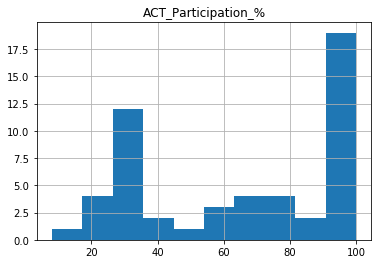

In [280]:
#Add axis labels
#plt.xlabel(xlab)
#plt.ylabel(ylab)
# Add title
#plt.title(title)




Testing_combo_data['ACT_Participation_%'].hist(bins=10);
plt.title('ACT_Participation_%')


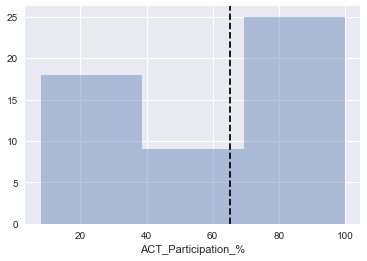

In [435]:
import seaborn as sns
sns.set()

sns.distplot(Testing_combo_data['ACT_Participation_%'], kde=False);
plt.axvline(65.153846, color="k", linestyle="--");

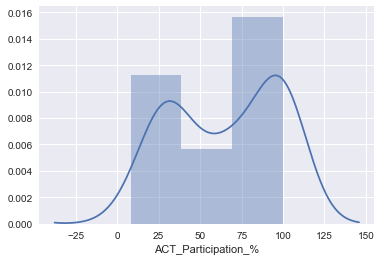

In [440]:
sns.distplot(Testing_combo_data['ACT_Participation_%'])

In [343]:
Testing_combo_data['ACT_Participation_%'].describe()

count     52.000000
mean      65.153846
std       31.832518
min        8.000000
25%       31.000000
50%       68.000000
75%      100.000000
max      100.000000
Name: ACT_Participation_%, dtype: float64

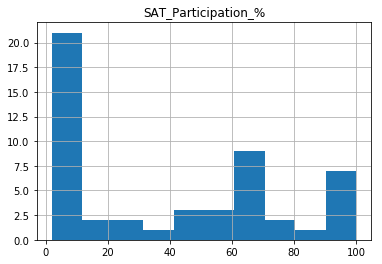

In [338]:
Testing_combo_data['SAT_Participation_%'].hist(bins=10);
plt.title('SAT_Participation_%')

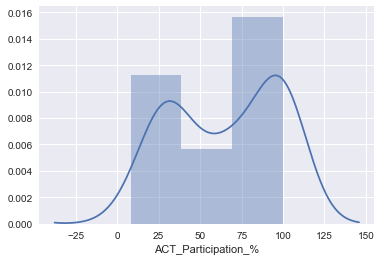

In [439]:
sns.distplot(Testing_combo_data['ACT_Participation_%'])

In [438]:
Testing_combo_data['SAT_Participation_%']

0       NaN
1       5.0
2      38.0
3      30.0
4       3.0
5      53.0
6      11.0
7     100.0
8     100.0
9     100.0
10     83.0
11     61.0
12     55.0
13     93.0
14      9.0
15     63.0
16      2.0
17      4.0
18      4.0
19      4.0
20     95.0
21     69.0
22     76.0
23    100.0
24      3.0
25      2.0
26      3.0
27     10.0
28      3.0
29     26.0
30     96.0
31     70.0
32     11.0
33     67.0
34     49.0
35      2.0
36     12.0
37      7.0
38     43.0
39     65.0
40     71.0
41     50.0
42      3.0
43      5.0
44     62.0
45      3.0
46     60.0
47     65.0
48     64.0
49     14.0
50      3.0
51      3.0
Name: SAT_Participation_%, dtype: float64

In [344]:
Testing_combo_data['SAT_Participation_%'].describe()

count     51.000000
mean      39.803922
std       35.276632
min        2.000000
25%        4.000000
50%       38.000000
75%       66.000000
max      100.000000
Name: SAT_Participation_%, dtype: float64

##### 17. Plot the Math(s) distributions from both data sets.

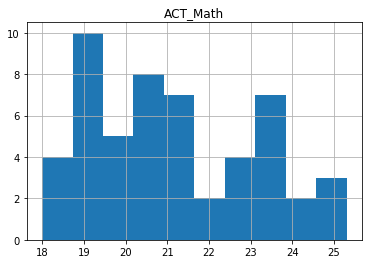

In [353]:
Testing_combo_data['ACT_Math'].hist(bins=10);
plt.title('ACT_Math')

In [351]:
Testing_combo_data['ACT_Math'].describe()

count    52.000000
mean     21.173077
std       1.963602
min      18.000000
25%      19.400000
50%      20.900000
75%      23.100000
max      25.300000
Name: ACT_Math, dtype: float64

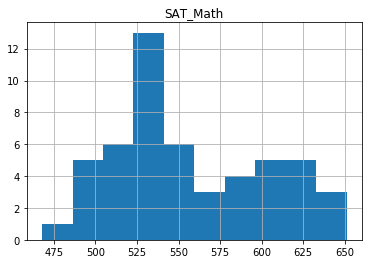

In [339]:
Testing_combo_data['SAT_Math'].hist(bins=10);
plt.title('SAT_Math')

In [354]:
Testing_combo_data['SAT_Math'].describe()

count     51.000000
mean     556.882353
std       47.121395
min      468.000000
25%      523.500000
50%      548.000000
75%      599.000000
max      651.000000
Name: SAT_Math, dtype: float64

##### 18. Plot the Verbal distributions from both data sets.

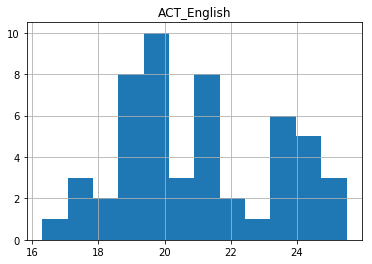

In [276]:
Testing_combo_data['ACT_English'].hist(bins=12);
plt.title('ACT_English')

In [355]:
Testing_combo_data['ACT_English'].describe()

count    52.000000
mean     20.919231
std       2.332132
min      16.300000
25%      19.000000
50%      20.550000
75%      23.300000
max      25.500000
Name: ACT_English, dtype: float64

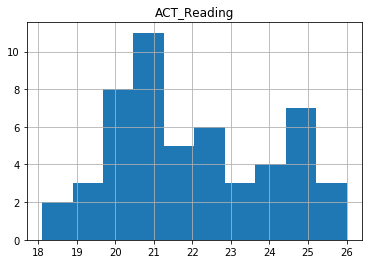

In [348]:
Testing_combo_data['ACT_Reading'].hist(bins=10);
plt.title('ACT_Reading')

In [356]:
Testing_combo_data['ACT_Reading'].describe()

count    52.000000
mean     22.001923
std       2.048672
min      18.100000
25%      20.475000
50%      21.700000
75%      24.125000
max      26.000000
Name: ACT_Reading, dtype: float64

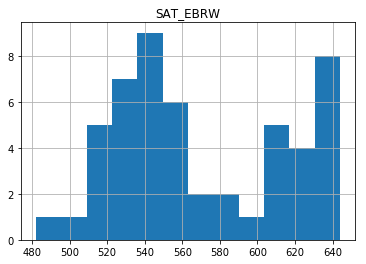

In [347]:
Testing_combo_data['SAT_EBRW'].hist(bins=12);
plt.title('SAT_EBRW')

In [357]:
Testing_combo_data['SAT_EBRW'].describe()

count     51.000000
mean     569.117647
std       45.666901
min      482.000000
25%      533.500000
50%      559.000000
75%      613.000000
max      644.000000
Name: SAT_EBRW, dtype: float64

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [ ]:
#The data seems consitenlty skewed either to the right or the left. I assume that 'Merica is very polarized when it 
#comes to outomes on standarized test. The data looking like it is being sampled by two different populations.


##### 20. Does this assumption hold true for any of our columns? Which?

In [285]:
SAT.columns


Index(['State', 'SAT_EBRW', 'SAT_Math', 'SAT_Total', 'SAT_Participation_%'], dtype='object')

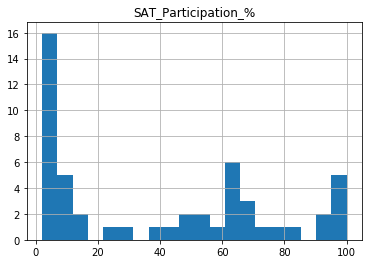

In [303]:
#Testing_combo_data['SAT_Math'].hist(bins=20);
#Testing_combo_data['SAT_EBRW'].hist(bins=20);
#Testing_combo_data['SAT_Total'].hist(bins=20);
Testing_combo_data['SAT_Participation_%'].hist(bins=20);
plt.title('SAT_Participation_%')

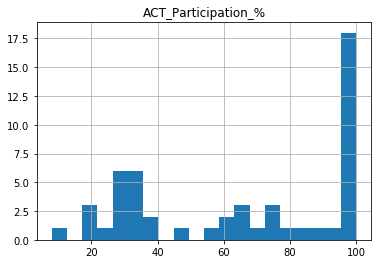

In [304]:
Testing_combo_data['ACT_Participation_%'].hist(bins=20);
plt.title('ACT_Participation_%')

In [ ]:
#It is interesting how participation for both test are almost total opposites. This may the sourse of the two means.
#States with lower participaton may only have students who are taking it for college requirements vs the whole population.
#They may have higher scores on average with to another extrema in the data.

##### 21. Plot some scatterplots examining relationships between all variables.

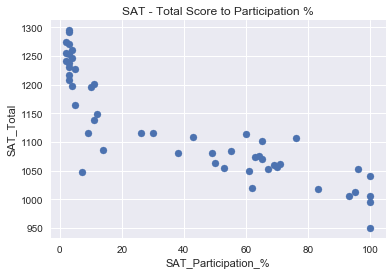

In [462]:
plt.scatter(Testing_combo_data['SAT_Participation_%'],Testing_combo_data['SAT_Total'])
plt.title("SAT - Total Score to Participation %")
plt.xlabel("SAT_Participation_%")
plt.ylabel("SAT_Total");


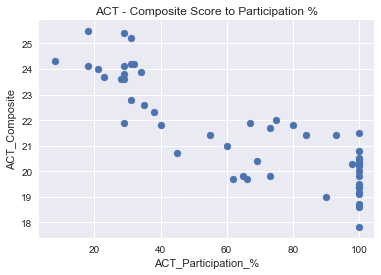

In [461]:
plt.scatter(Testing_combo_data['ACT_Participation_%'],Testing_combo_data['ACT_Composite'])
plt.title("ACT - Composite Score to Participation %")
plt.xlabel("ACT_Participation_%")
plt.ylabel("ACT_Composite");



##### 22. Are there any interesting relationships to note?

In [ ]:
#Both ACT_Composite and SAT_Total data seem inversly propotional to Participation rates. 

##### 23. Create box plots for each variable. 

In [397]:
ACT_ = ACT[['State', 'ACT_English', 'ACT_Math', 'ACT_Reading', 'ACT_Science',
       'ACT_Composite']]

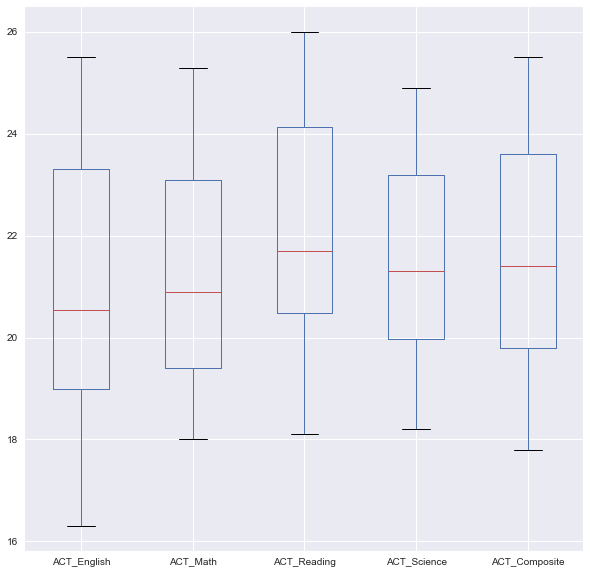

In [449]:
ACT_.boxplot(figsize = (10, 10));

In [395]:
SAT_ = SAT[['State', 'SAT_EBRW', 'SAT_Math', 'SAT_Total']]


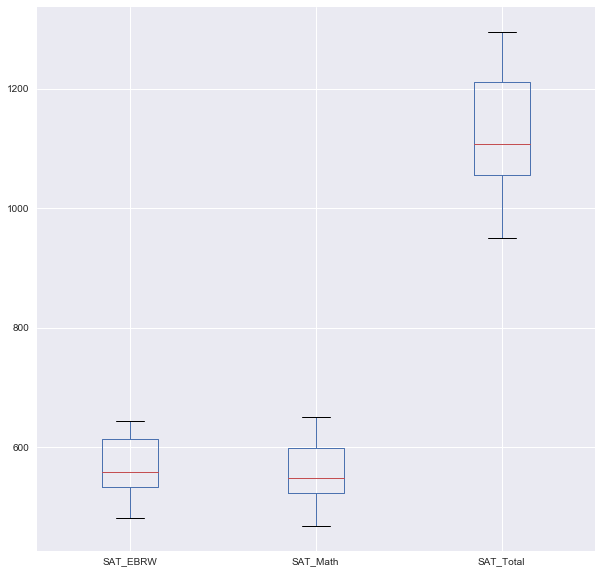

In [452]:
SAT_.boxplot(figsize = (10, 10));

In [400]:
Testing_combo_data_ = Testing_combo_data[['State', 'ACT_Participation_%', 'SAT_Participation_%']]


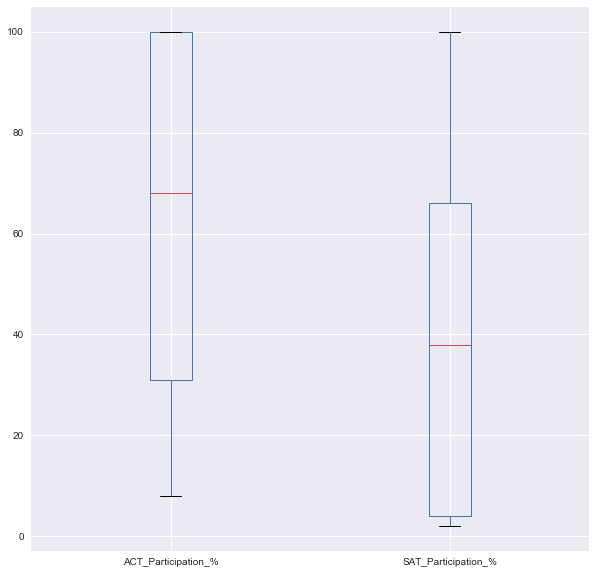

In [454]:
Testing_combo_data_.boxplot(figsize = (10, 10));

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [ ]:
#ACT_Participation_% Histogram
#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       31.832518
#min        8.000000
#max      100.000000

#Center:
#mean      65.153846

In [ ]:
#SAT_Participation_% Histogram

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       35.276632
#min        2.000000
#max      100.000000

#Center:
#mean      39.803922

In [ ]:
#ACT_Math Histogram

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       1.963602
#min      18.000000
#max      25.300000

#Center:
#mean     21.173077

In [ ]:
#SAT_Math Histogram

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       47.121395
#min      468.000000
#max      651.000000

#Center:
#mean     556.882353



In [ ]:
#ACT_English

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread

#std       2.332132
#min      16.300000
#max      25.500000

#Center:
#mean     20.919231

In [ ]:
#ACT_Reading

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:

#std       2.048672
#min      18.100000
#max      26.000000

#Center:
#mean     22.001923

In [ ]:
#SAT_Evidence-Based Reading and Writing

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       45.666901
#min      482.000000
#max      644.000000

#Center:
#mean     569.117647



##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [ ]:
#Both ACT_Composite and SAT_Total data seem inversly propotional to Participation rates. 

In [377]:
data = Testing_combo_data[['SAT_Participation_%','SAT_Total']]
SAT_correlation = data.corr(method='pearson')

print(SAT_correlation)

                     SAT_Participation_%  SAT_Total
SAT_Participation_%              1.00000   -0.86754
SAT_Total                       -0.86754    1.00000


In [446]:
#np.corrcoef(Testing_combo_data['SAT_Participation_%'][0:], Testing_combo_data['SAT_Total'][0:], rowvar=False)

In [376]:
data = Testing_combo_data[['ACT_Participation_%','ACT_Composite']]
ACT_correlation = data.corr(method='pearson')

print(ACT_correlation)

                     ACT_Participation_%  ACT_Composite
ACT_Participation_%              1.00000       -0.85653
ACT_Composite                   -0.85653        1.00000


##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [422]:
A = ACT.loc[1:,['State', 'ACT_Participation_%']] 


In [380]:
import scipy.stats as stats
conf_level = 0.95
mean_SAT_Part = 39.803922
sigma_SAT_Part = 35.276632

mean_ACT_Part = 65.153846
sigma_ACT_Part = 31.832518

#stats.t.interval(alpha = 0.99,                # Confidence level
#                 df = 49,                     # Degrees of freedom
#                loc = minnesota_ages.mean(), # Sample mean
#                 scale= sigma)                # Standard dev estimate

In [447]:
#SAT Participation Rates
stats.t.interval(alpha = 0.05, df = 50,loc = mean_SAT_Part,scale=sigma_SAT_Part)                

(37.580706620022895, 42.027137379977106)

In [426]:
#ACT Participation Rates
stats.t.interval(alpha = 0.95, df = 50,loc = mean_ACT_Part,scale=sigma_ACT_Part)                

(1.2163519859267353, 129.09134001407327)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [381]:
#SAT Participation Rates
stats.norm.interval(conf_level, loc=mean_SAT_Part, scale=sigma_SAT_Part)

(-29.337006215873174, 108.94485021587317)

In [382]:
#ACT Participation Rates
stats.norm.interval(conf_level, loc=mean_ACT_Part, scale=sigma_ACT_Part)

(2.7632571827770107, 127.54443481722299)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [ ]:
#Yes.  The values are larger than the scale when stats.norm.interval is used. Also, the confidence generated for
#hypothesis test is larger than the one generated for with the stats.norm.intervval function.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [ ]:
# I don't think that is appropriate to correlate the two test. Though they both test math, they have different populations
#taking the test. States don't share the same mandatory tests.

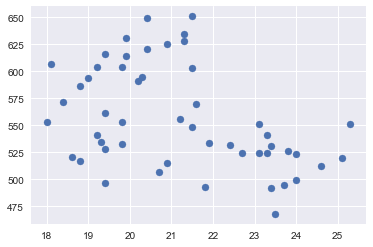

In [455]:
plt.scatter(Testing_combo_data['ACT_Math'],Testing_combo_data['SAT_Math']);

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [ ]:
#No. With the data that we have, we cannot accurately infer how the greater population would look.
#We do know that if the test was mandatory, the means for both test would drop.